In [1]:
from docplex.mp.model import Model
from docplex.mp.model_reader import ModelReader
from qiskit_optimization.translators import from_docplex_mp
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.algorithms import CplexOptimizer
from qiskit.circuit.library import TwoLocal
# from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Sampler, Session, Options
from qiskit import transpile, QuantumCircuit

Free energy plots


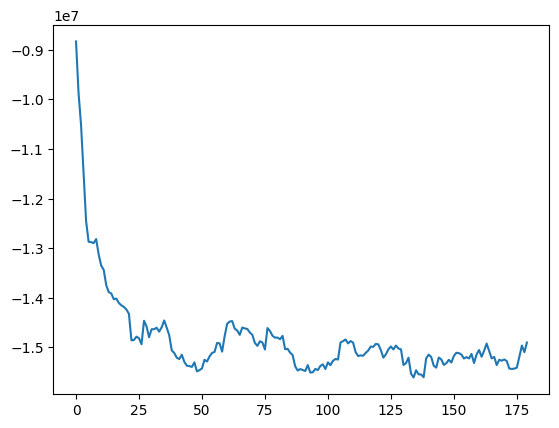

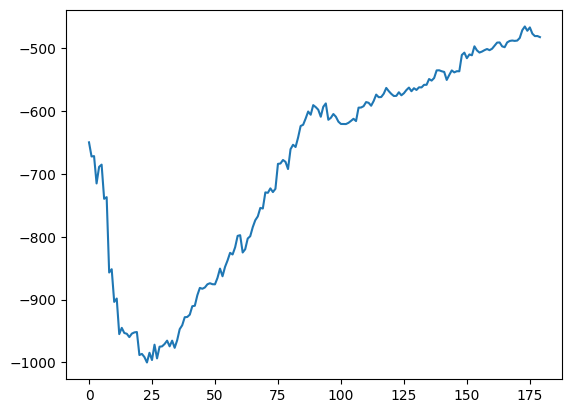

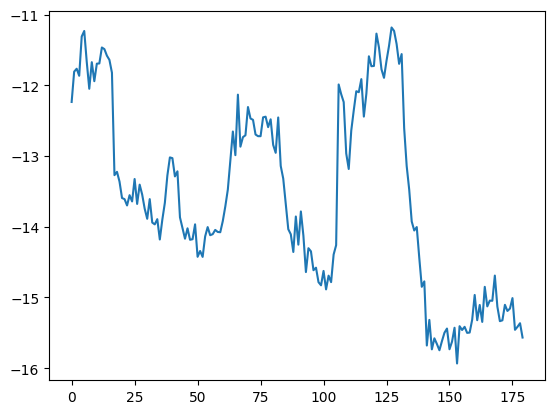

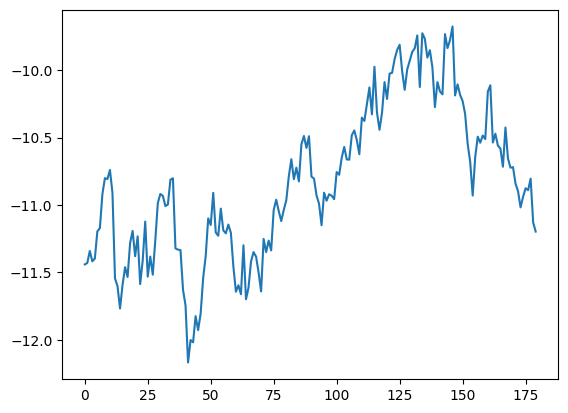

Energy plots


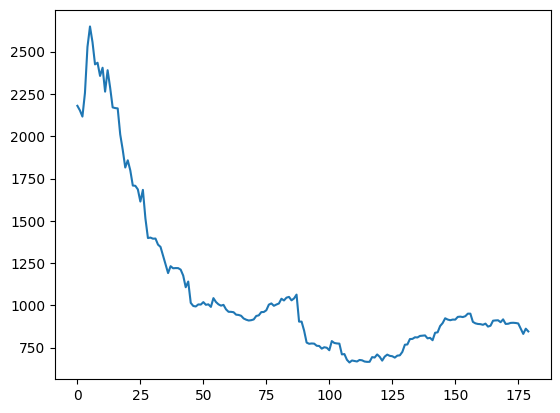

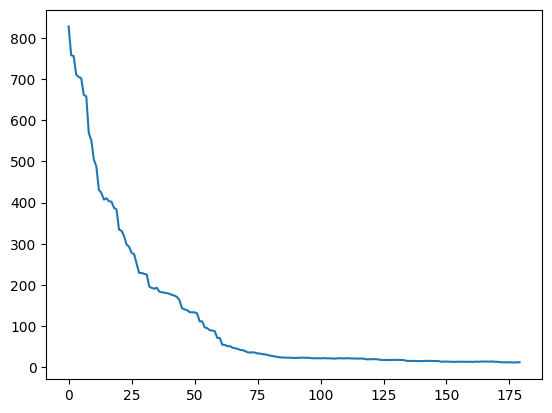

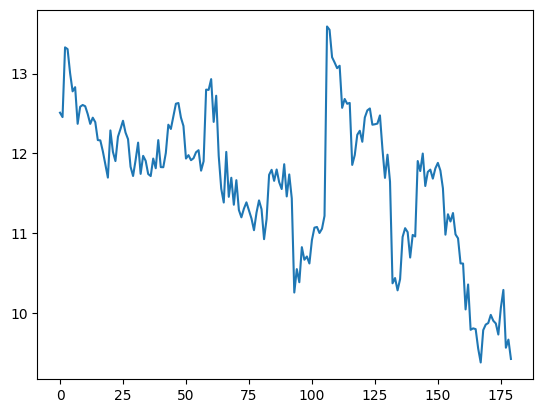

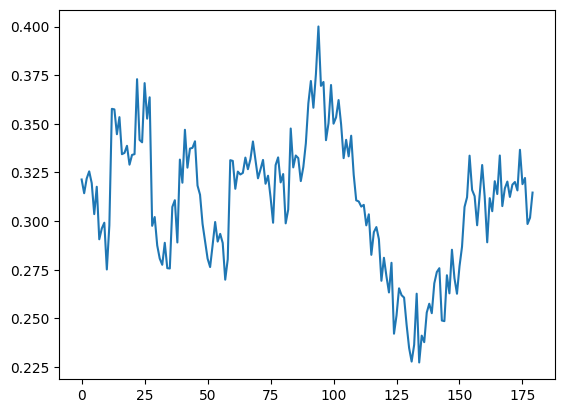

Entropy plots


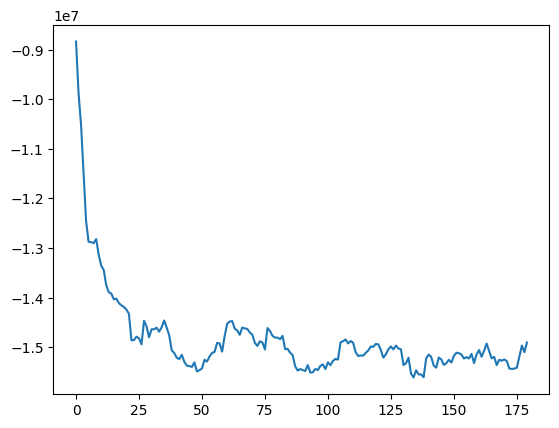

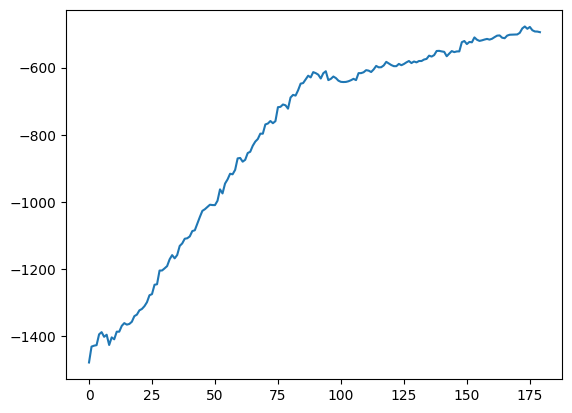

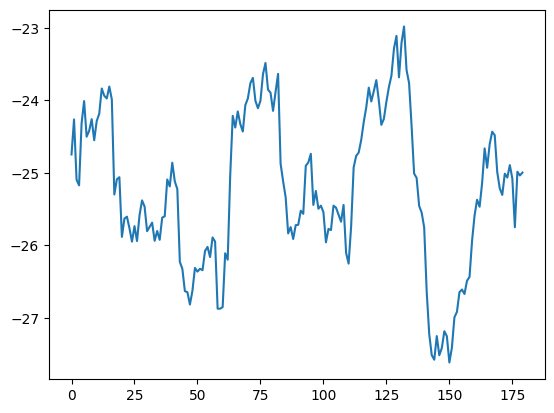

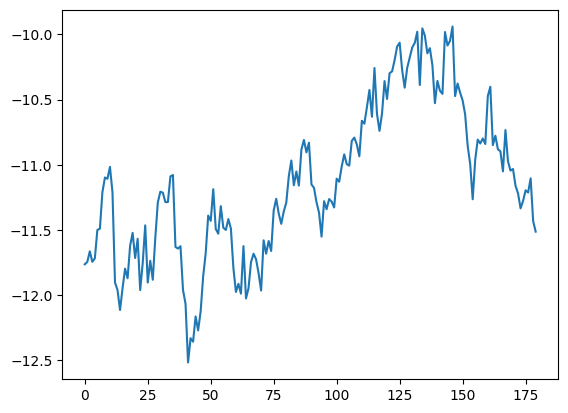

In [5]:
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

print("Free energy plots")
for beta in [0.0001, 1.0, 20, 100.0]:
    all_log = []
    for itrial in range(0, 10):
        filename = 'log_b_' + str(beta) + '_trial_' + str(itrial)
        with open('N30/a_1/' + filename, 'rb') as fp:
            log = pickle.load(fp)    
        #all_log.append([x for x in log['expec_log']])
        all_log.append([x+y for (x, y) in zip(log['expec_log'], log['entrpy_log'])])
    plt.plot(np.mean(all_log, 0), '-')
    plt.show()
#plt.yscale('log')
#plt.ylim([-92.0, -85.0])
#plt.legend([0.0001, 1.0, 20])

print("Energy plots")
for beta in [0.0001, 1.0, 20, 100.0]:
    all_log = []
    for itrial in range(0, 10):
        filename = 'log_b_' + str(beta) + '_trial_' + str(itrial)
        with open('N30/a_1/' + filename, 'rb') as fp:
            log = pickle.load(fp)    
        all_log.append([x for x in log['expec_log']])
        #all_log.append([x+y for (x, y) in zip(log['expec_log'], log['entrpy_log'])])
    plt.plot(np.mean(all_log, 0), '-')
    plt.show()
#plt.yscale('log')
#plt.ylim([-92.0, -85.0])
#plt.legend([0.0001, 1.0, 20])

print("Entropy plots")
for beta in [0.0001, 1.0, 20, 100.0]:
    all_log = []
    for itrial in range(0, 10):
        filename = 'log_b_' + str(beta) + '_trial_' + str(itrial)
        with open('N30/a_1/' + filename, 'rb') as fp:
            log = pickle.load(fp)    
        all_log.append([x for x in log['entrpy_log']])
        #all_log.append([x+y for (x, y) in zip(log['expec_log'], log['entrpy_log'])])
    plt.plot(np.mean(all_log, 0), '-')
    plt.show()
#plt.yscale('log')
#plt.ylim([-92.0, -85.0])
#plt.legend([0.0001, 1.0, 20])

Free energy plots


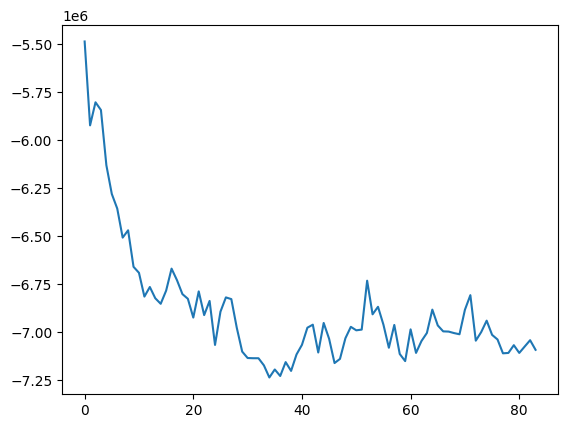

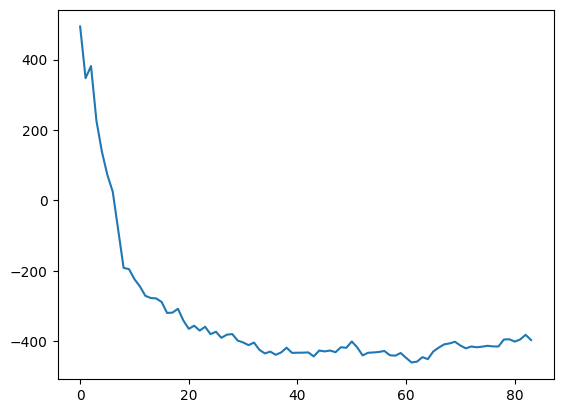

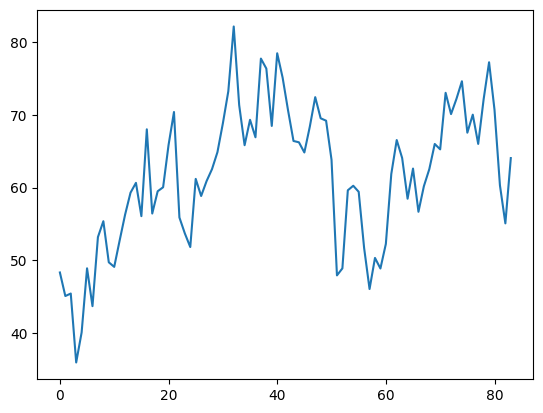

Energy plots


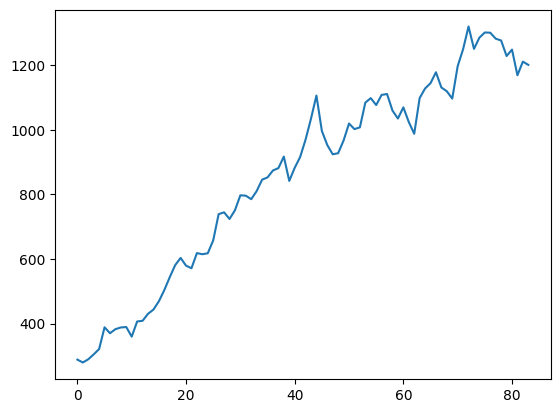

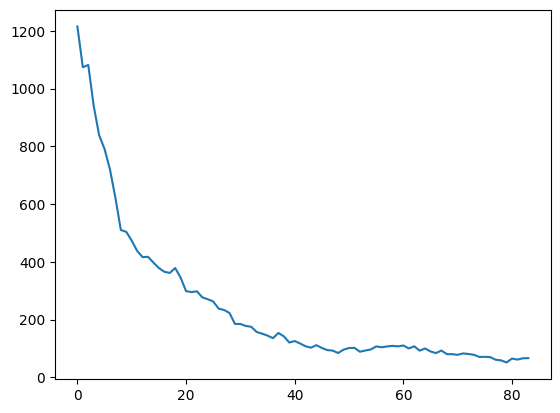

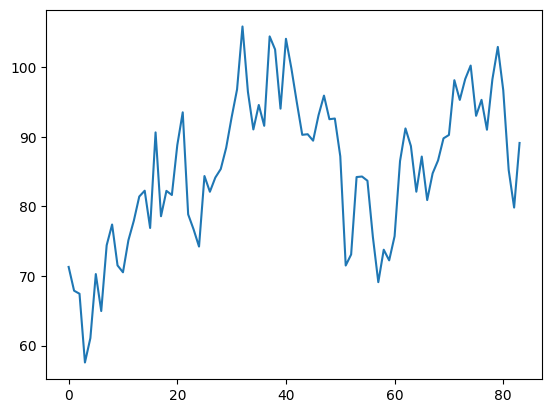

Entropy plots


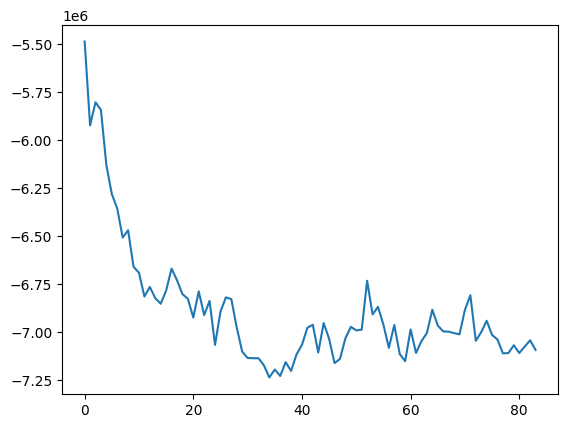

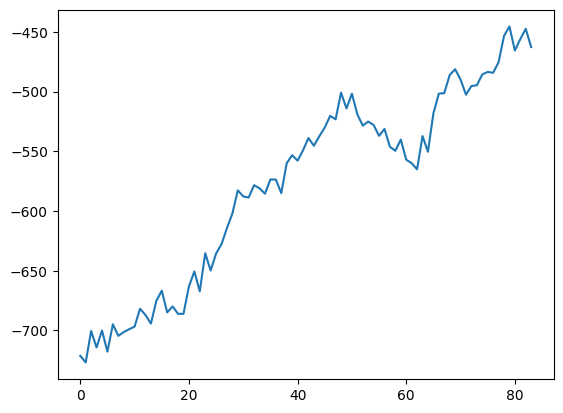

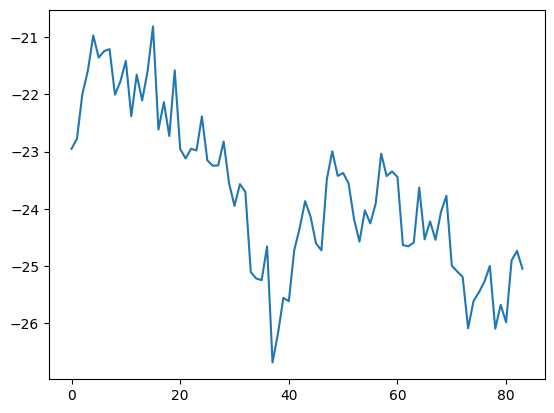

In [90]:
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

print("Free energy plots")
for beta in [0.0001, 1.0, 20, 100]:
    all_log = []
    for itrial in range(0, 10):
        filename = 'log_b_' + str(beta) + '_trial_' + str(itrial)
        with open('N14/' + filename, 'rb') as fp:
            log = pickle.load(fp)    
        #all_log.append([x for x in log['expec_log']])
        all_log.append([x+y for (x, y) in zip(log['expec_log'], log['entrpy_log'])])
    plt.plot(np.mean(all_log, 0), '-')
    plt.show()
#plt.yscale('log')
#plt.ylim([-92.0, -85.0])
#plt.legend([0.0001, 1.0, 20])

print("Energy plots")
for beta in [0.0001, 1.0, 20, 100]:
    all_log = []
    for itrial in range(0, 10):
        filename = 'log_b_' + str(beta) + '_trial_' + str(itrial)
        with open('N14/' + filename, 'rb') as fp:
            log = pickle.load(fp)    
        all_log.append([x for x in log['expec_log']])
        #all_log.append([x+y for (x, y) in zip(log['expec_log'], log['entrpy_log'])])
    plt.plot(np.mean(all_log, 0), '-')
    plt.show()
#plt.yscale('log')
#plt.ylim([-92.0, -85.0])
#plt.legend([0.0001, 1.0, 20])

print("Entropy plots")
for beta in [0.0001, 1.0, 20, 100]:
    all_log = []
    for itrial in range(0, 10):
        filename = 'log_b_' + str(beta) + '_trial_' + str(itrial)
        with open('N14/' + filename, 'rb') as fp:
            log = pickle.load(fp)    
        all_log.append([x for x in log['entrpy_log']])
        #all_log.append([x+y for (x, y) in zip(log['expec_log'], log['entrpy_log'])])
    plt.plot(np.mean(all_log, 0), '-')
    plt.show()
#plt.yscale('log')
#plt.ylim([-92.0, -85.0])
#plt.legend([0.0001, 1.0, 20])

In [91]:
mod = Model()
mod = ModelReader.read_model('../../../lp_G0_lp_c/seq_1149_c.lp')

#convert linear program to qubo
qp = from_docplex_mp(mod)
qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
#quboOp, offset = qubo.to_ising()
Q_info = qubo.objective.quadratic.coefficients.copy()
l_diag = qubo.objective.linear
for k in range(qp.get_num_vars()):
    Q_info[k,k] += l_diag[k]

Q = Q_info.tocoo()
scaling = np.abs(np.max(Q))
Q=Q/scaling #scale coefficients
Q_data = np.stack([Q.row, Q.col, Q.data], axis=1)

In [92]:
reps = 2
num_qubits = qp.get_num_vars()
print(num_qubits)

ansatz = TwoLocal(
    num_qubits = num_qubits,
    rotation_blocks = 'ry', 
    entanglement_blocks = 'cz',
    entanglement = 'pairwise', 
    reps = reps,
    insert_barriers = True
    )

n_params = ansatz.num_parameters 

14


Free energy plots


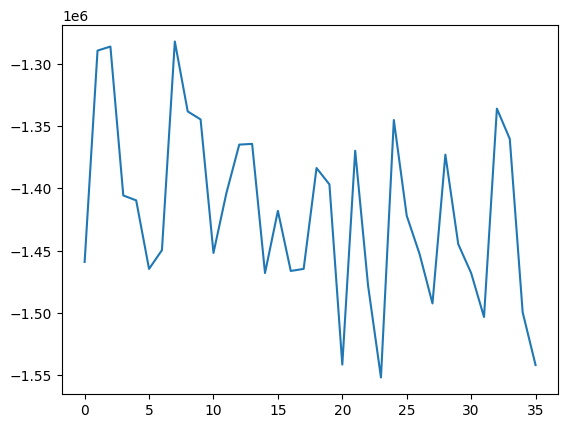

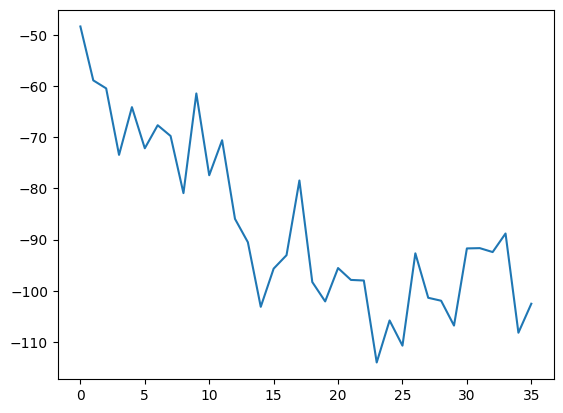

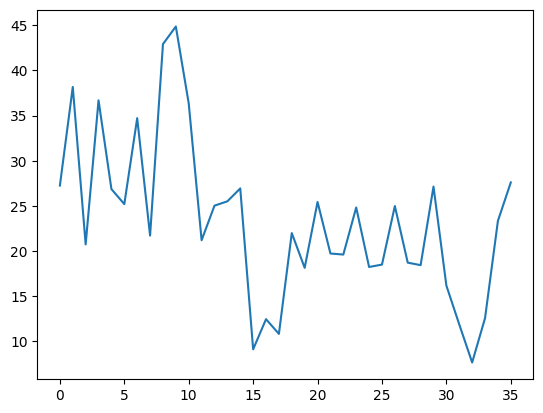

Energy plots


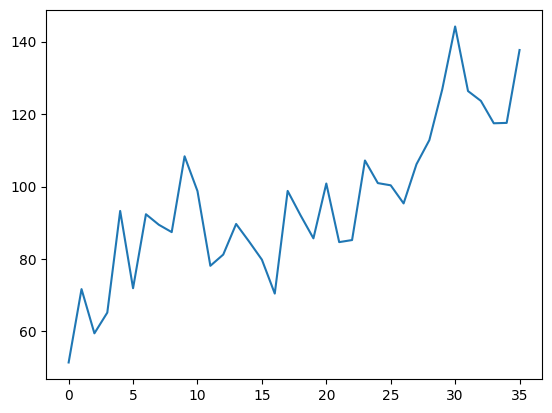

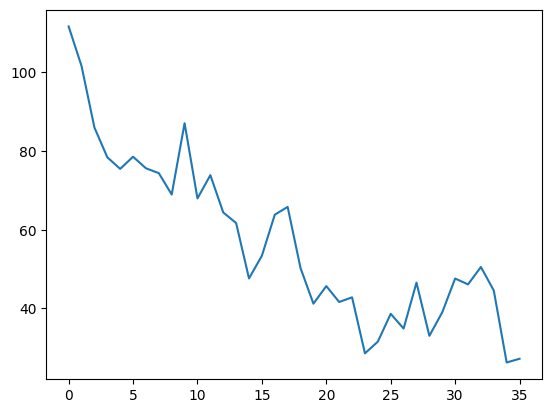

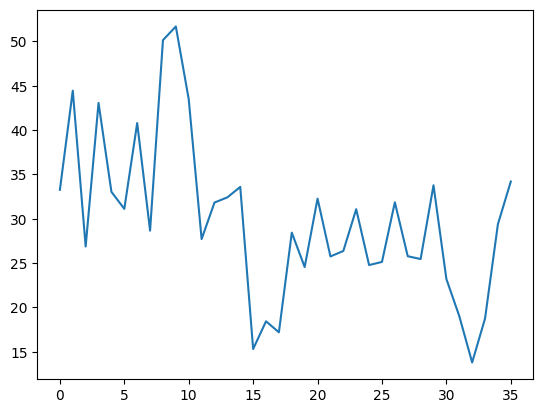

Entropy plots


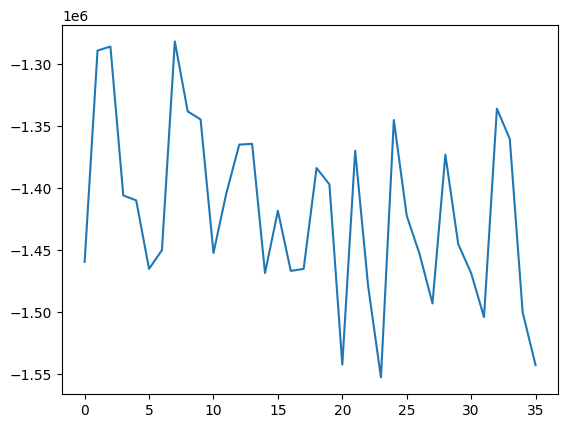

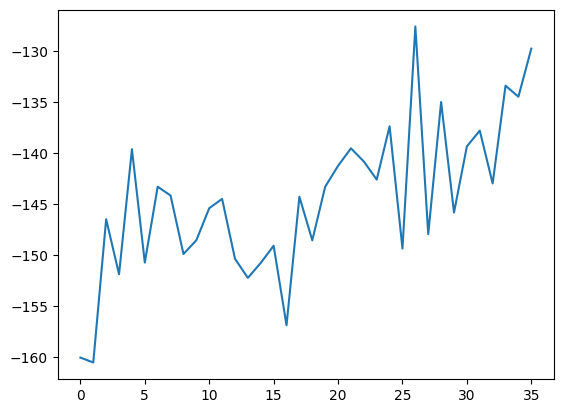

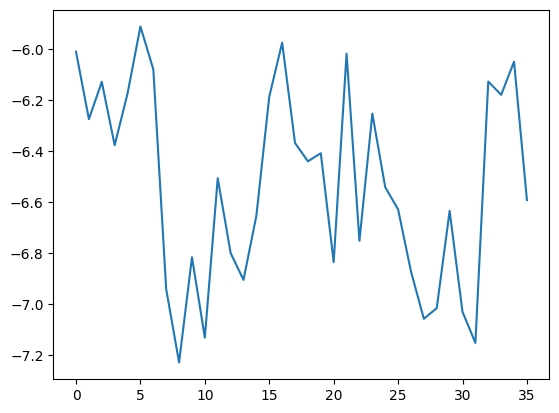

In [103]:
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

print("Free energy plots")
for beta in [0.0001, 1.0, 20]:
    all_log = []
    for itrial in range(0, 10):
        filename = 'log_b_' + str(beta) + '_trial_' + str(itrial)
        with open('N6/' + filename, 'rb') as fp:
            log = pickle.load(fp)    
        #all_log.append([x for x in log['expec_log']])
        all_log.append([x+y for (x, y) in zip(log['expec_log'], log['entrpy_log'])])
    plt.plot(np.mean(all_log, 0), '-')
    plt.show()
#plt.yscale('log')
#plt.ylim([-92.0, -85.0])
#plt.legend([0.0001, 1.0, 20])

print("Energy plots")
for beta in [0.0001, 1.0, 20]:
    all_log = []
    for itrial in range(0, 10):
        filename = 'log_b_' + str(beta) + '_trial_' + str(itrial)
        with open('N6/' + filename, 'rb') as fp:
            log = pickle.load(fp)    
        all_log.append([x for x in log['expec_log']])
        #all_log.append([x+y for (x, y) in zip(log['expec_log'], log['entrpy_log'])])
    plt.plot(np.mean(all_log, 0), '-')
    plt.show()
#plt.yscale('log')
#plt.ylim([-92.0, -85.0])
#plt.legend([0.0001, 1.0, 20])

print("Entropy plots")
for beta in [0.0001, 1.0, 20]:
    all_log = []
    for itrial in range(0, 10):
        filename = 'log_b_' + str(beta) + '_trial_' + str(itrial)
        with open('N6/' + filename, 'rb') as fp:
            log = pickle.load(fp)    
        all_log.append([x for x in log['entrpy_log']])
        #all_log.append([x+y for (x, y) in zip(log['expec_log'], log['entrpy_log'])])
    plt.plot(np.mean(all_log, 0), '-')
    plt.show()
#plt.yscale('log')
#plt.ylim([-92.0, -85.0])
#plt.legend([0.0001, 1.0, 20])

In [93]:
from itertools import product
import matplotlib.pyplot as plt
from qiskit_aer.primitives import Sampler
from collections import defaultdict

def objective(x):
    x = np.array(list(x)).astype(int)
    x = np.flip(x)
    objval = x @ Q @ x
    return objval

shots = 2**14

sampler = Sampler(backend_options={'method' : 'matrix_product_state', 'n_qubits': num_qubits})
sampler.set_options(shots=shots)

fid_beta = []
fid_beta_std = []
prob_list = defaultdict(list)
for beta in [0.0001, 1.0]:
    all_log = []

    ee = {}
    prob = {}

    bit_str = [''.join(p) for p in product('10', repeat=num_qubits)]
    Z = 0.0
    for elem in bit_str:
        ee[elem] = objective([int(i) for i in elem])
        prob[elem] = np.exp(-beta * ee[elem])
        Z+=prob[elem]
    
    true_prob = {k:(v/Z) for (k,v) in zip(prob.keys(), prob.values())}

    fid_list = []
    for itrial in range(0, 10):
        filename = 'log_b_' + str(beta) + '_trial_' + str(itrial)
        with open('N14/' + filename, 'rb') as fp:
            log = pickle.load(fp)
        qc = ansatz.copy()
        qc.measure_all()

        job = sampler.run(qc, log['theta'])
        result = job.result()
        quasi_dist = result.quasi_dists[0]
        prob_dict = quasi_dist.binary_probabilities()
        prob_list[beta].append(prob_dict) 
        fid = 0.0
        for bit_str, val in true_prob.items():
            if np.flip(bit_str) in prob_list[beta][itrial].keys():
                fid+= np.sqrt(val * prob_list[beta][itrial][bit_str])
        fid_list.append(fid)
    fid_beta.append(np.mean(fid_list, axis=0))
    fid_beta_std.append(np.std(fid_list, axis=0))

In [94]:
mod = Model()
mod = ModelReader.read_model('../../../lp_G0_lp_c/seq_1057_c.lp')

#convert linear program to qubo
qp = from_docplex_mp(mod)
qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
#quboOp, offset = qubo.to_ising()
Q_info = qubo.objective.quadratic.coefficients.copy()
l_diag = qubo.objective.linear
for k in range(qp.get_num_vars()):
    Q_info[k,k] += l_diag[k]

Q = Q_info.tocoo()
scaling = np.abs(np.max(Q))
Q=Q/scaling #scale coefficients
Q_data = np.stack([Q.row, Q.col, Q.data], axis=1)

reps = 2
num_qubits = qp.get_num_vars()
print(num_qubits)

ansatz = TwoLocal(
    num_qubits = num_qubits,
    rotation_blocks = 'ry', 
    entanglement_blocks = 'cz',
    entanglement = 'pairwise', 
    reps = reps,
    insert_barriers = True
    )

n_params = ansatz.num_parameters 

6


In [101]:
from itertools import product
import matplotlib.pyplot as plt
from qiskit_aer.primitives import Sampler
from collections import defaultdict

def objective(x):
    x = np.array(list(x)).astype(int)
    x = np.flip(x)
    objval = x @ Q @ x
    return objval

shots = 2**15
num_qubits = 6

sampler = Sampler(backend_options={'method' : 'matrix_product_state', 'n_qubits': num_qubits})
sampler.set_options(shots=shots)

fid_beta = []
fid_beta_std = []
prob_list = defaultdict(list)
for beta in [0.0001, 1.0, 20]:
    all_log = []

    ee = {}
    prob = {}

    bit_str = [''.join(p) for p in product('10', repeat=num_qubits)]
    Z = 0.0
    for elem in bit_str:
        ee[elem] = objective([int(i) for i in elem])
        prob[elem] = np.exp(-beta * ee[elem])
        Z+=prob[elem]
    
    true_prob = {k:(v/Z) for (k,v) in zip(prob.keys(), prob.values())}

    fid_list = []
    for itrial in range(0, 10):
        filename = 'log_b_' + str(beta) + '_trial_' + str(itrial)
        with open('N6/' + filename, 'rb') as fp:
            log = pickle.load(fp)
        qc = ansatz.copy()
        qc.measure_all()

        job = sampler.run(qc, log['theta'])
        result = job.result()
        quasi_dist = result.quasi_dists[0]
        prob_dict = quasi_dist.binary_probabilities()
        prob_list[beta].append(prob_dict) 
        fid = 0.0
        for bit_str, val in true_prob.items():
            if np.flip(bit_str) in prob_list[beta][itrial].keys():
                fid+= np.sqrt(val * prob_list[beta][itrial][bit_str])
        fid_list.append(fid)
    fid_beta.append(np.mean(fid_list, axis=0))
    fid_beta_std.append(np.std(fid_list, axis=0))

<ErrorbarContainer object of 3 artists>

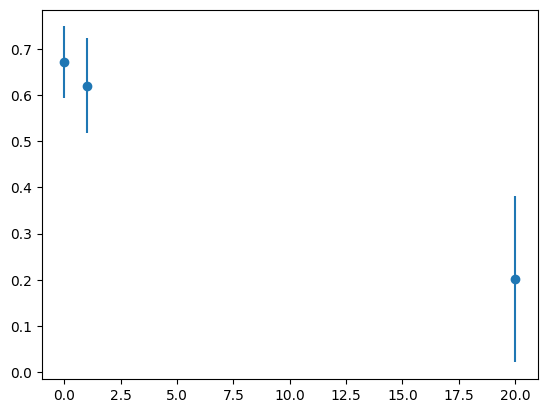

In [102]:
plt.errorbar([0.0001, 1.0, 20], fid_beta, fid_beta_std, fmt='o')

In [57]:
bit_str = [''.join(p) for p in product('10', repeat=num_qubits)]
Z = 0.0
for elem in bit_str:
    print([int(i)*0 for i in elem], objective([int(i)*0 for i in elem]))
    break

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0.0


In [48]:
l_diag.to_array()

array([-2.1 , -2.1 ,  0.3 , -2.1 , -1.5 , -1.4 , -1.75, -0.95, -2.5 ,
       -2.1 , -2.1 ,  0.3 , -2.1 , -1.1 ])

In [50]:
qubo.objective.quadratic.to_array().shape

(14, 14)

In [54]:
Q.todense().shape

(14, 14)

In [58]:
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] @ Q @ [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

-0.030973451327433624

In [59]:
np.exp(0.0001 * 0.03)

1.0000030000045

In [60]:
len(bit_str)

16384